Séries Temporais - decomposição da série temporal com dados do Bitcoin

In [ ]:
# Exemplo de decomposição de série temporal com Python. 
# importando o Pandas, o IO para leitura do arquivo e a biblioteca datetime
# os dados do bitcoin foram obtidos em: https://coinmarketcap.com/

import pandas as pd
import io
from datetime import datetime

# bibliotecas para gerar os gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# importando também o modelo estatístico para trabalhar com a decomposição da série temporal
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# carregando dados para o Google Colab
from google.colab import files
uploaded = files.upload()

Saving ST-aula2-bitcoin.csv to ST-aula2-bitcoin (2).csv


In [ ]:
# carregando o arquivo para o dataframe bitcoin
bitcoin = pd.read_csv(io.BytesIO(uploaded['ST-aula2-bitcoin.csv']))

In [ ]:
# visualizar os dados carregados
bitcoin.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Sep 30, 2021",41551.27,44092.60,41444.58,43790.90,31141681925,824619217608
1,"Sep 29, 2021",41064.98,42545.26,40829.67,41564.36,30602359905,782651228474
2,"Sep 28, 2021",42200.90,42775.15,40931.66,41034.54,30214940550,772639687709
3,"Sep 27, 2021",43234.18,44313.25,42190.63,42235.73,30980029059,795216175345
4,"Sep 26, 2021",42721.63,43919.30,40848.46,43208.54,30661222077,813490665613


Cada coluna do arquivo bitcoin.csv significa o seguinte:

**Date:** informa o dia em que os dados foram registrados

**Open**: valor de abertura do bitcoin considerando 12:01 AM UTC

**High**: valor máximo obtido pelo bitcoin no dia

**Low**: valor mínimo obtido pelo bitcoin no dia

**Close**: valor de fechamento do bitcoin considerando 11:59 PM UTC

**Volume**: volume de bitcoins negociados no dia

**Market Cap**: valor total de todas as ações de uma empresa, é a capitalização de mercado

In [ ]:
# identificar o tamanho da base de dados
bitcoin.shape

(638, 7)

In [ ]:
# convertendo o campo date para ser do tipo datetime
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])

# verificando a conversão, deve aparecer: pandas._libs.tslibs.timestamps.Timestamp
type(bitcoin.loc[0]['Date'])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# visualizar os dados carregados para verificar a mudança
bitcoin.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2021-09-30,41551.27,44092.60,41444.58,43790.90,31141681925,824619217608
1,2021-09-29,41064.98,42545.26,40829.67,41564.36,30602359905,782651228474
2,2021-09-28,42200.90,42775.15,40931.66,41034.54,30214940550,772639687709
3,2021-09-27,43234.18,44313.25,42190.63,42235.73,30980029059,795216175345
4,2021-09-26,42721.63,43919.30,40848.46,43208.54,30661222077,813490665613


In [ ]:
# ajustando o índice do DataFrame para que seja considerado a coluna Date
# para isto devemos utilizar o método set_index()

bitcoin.set_index('Date', inplace=True)

In [ ]:
# tornando a coluna Date como índice possibilita fazer consultas de forma mais simplificada na série temporal, sem precisar criar janelas
# como exemplo listaremos os registros referentes a janeiro

bitcoin['January 2020'].head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2020-01-31,9508.31,9521.71,9230.78,9350.53,29432489719,170112778161
2020-01-30,9316.02,9553.13,9230.90,9508.99,32378792851,172978577931
2020-01-29,9357.47,9406.43,9269.47,9316.63,30682598115,169460984603
2020-01-28,8912.52,9358.59,8908.45,9358.59,34398744403,170205617955
2020-01-27,8597.31,8977.73,8597.31,8909.82,28647338393,162027957435


In [ ]:
# vamos gerar um subconjutno de dados contendo somente a data e a coluna Close

bitcoinDecomposto = bitcoin.drop(bitcoin.columns[[0, 1, 2, 4, 5]], axis=1)

In [ ]:
# visualizar os dados carregados para verificar a mudança
bitcoinDecomposto.head()

,Close
Date,
2021-09-30,43790.90
2021-09-29,41564.36
2021-09-28,41034.54
2021-09-27,42235.73
2021-09-26,43208.54


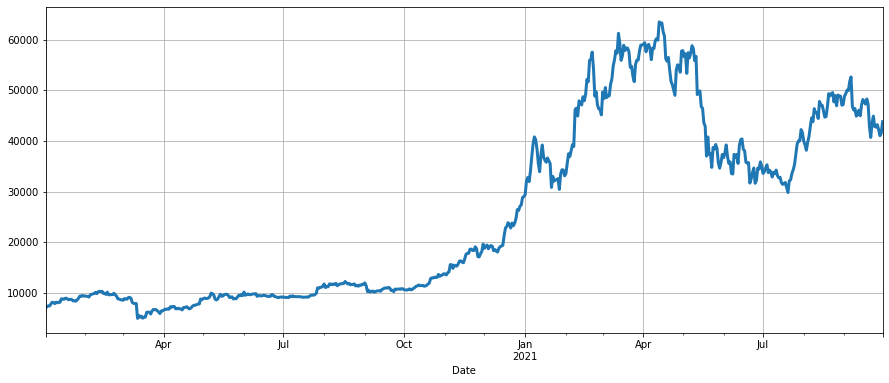

In [ ]:
# o estudo das séries temporais utiliza muitos gráficos
# como exemplo vamos utilizar um gráfico de linha projetando as variações do valor de abertura diário (Close)

bitcoinDecomposto['Close'].plot(figsize=(15,6), grid=True, linewidth=3)

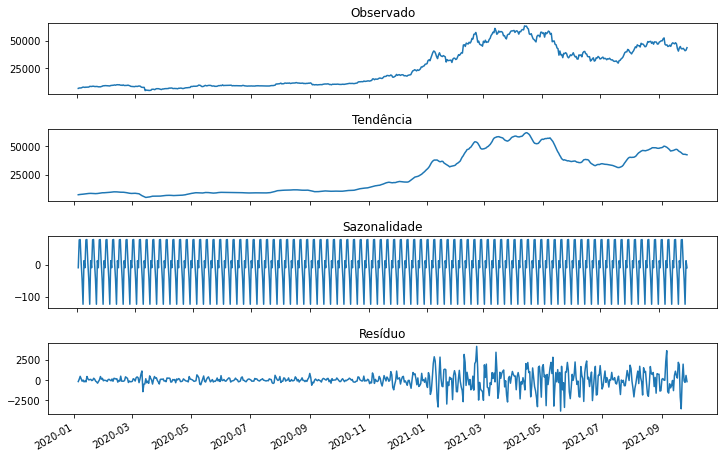

In [ ]:
# vamos realizar a decomposição salvando o resultado em: analise</em>
analise = seasonal_decompose(bitcoinDecomposto)

# geraremos 4 gráficos, sendo eles:
# 1 - Observação original
# 2 - Tendência
# 3 - Sazonalidade
# 4 - Residual ou variável aleatória

fig, ax = plt.subplots(figsize=(12,8))
plt.subplots_adjust(hspace=0.5)

ax0 = plt.subplot(411)
plt.plot(analise.observed)
ax0.set_title('Observado')

ax1 = plt.subplot(412)
plt.plot(analise.trend)
ax1.set_title('Tendência')

ax2 = plt.subplot(413)
plt.plot(analise.seasonal)
ax2.set_title('Sazonalidade')

ax3 = plt.subplot(414)
plt.plot(analise.resid)
ax3.set_title('Resíduo')
fig.autofmt_xdate()

Para visualizar melhor a tendência, sazonalidade e o residual, vamos utilizar os dados referentes ao valor do combustível no segundo semestre de 2020

Fonte: https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/serie-historica-de-precos-de-combustiveis

In [ ]:
# carregando dados para o Google Colab
from google.colab import files
uploaded = files.upload()

Saving ST-aula3-gasolina.csv to ST-aula3-gasolina (3).csv


In [ ]:
# carregando o arquivo para o dataframe bitcoin
gasolina = pd.read_csv(io.BytesIO(uploaded['ST-aula3-gasolina.csv']))

In [ ]:
# visualizar os dados carregados
gasolina.head()

,Data,Valor
0,01/07/2020,3.980609
1,02/07/2020,3.965667
2,06/07/2020,4.264714
3,07/07/2020,3.890818
4,08/07/2020,3.945381


In [ ]:
# convertendo o campo date para ser do tipo datetime
gasolina['Data'] = pd.to_datetime(gasolina['Data'])

# verificando a conversão, deve aparecer: pandas._libs.tslibs.timestamps.Timestamp
type(gasolina.loc[0]['Data'])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
gasolina.head()

,Data,Valor
0,2020-01-07,3.980609
1,2020-02-07,3.965667
2,2020-06-07,4.264714
3,2020-07-07,3.890818
4,2020-08-07,3.945381


In [ ]:
# identificar o tamanho da base de dados
gasolina.shape

(51, 2)

In [ ]:
# ajustando o índice do DataFrame para que seja considerado a coluna Date
# para isto devemos utilizar o método set_index()

gasolina.set_index('Data', inplace=True)

In [ ]:
# verificando as mudanças
gasolina.head()

,Valor
Data,
2020-01-07,3.980609
2020-02-07,3.965667
2020-06-07,4.264714
2020-07-07,3.890818
2020-08-07,3.945381


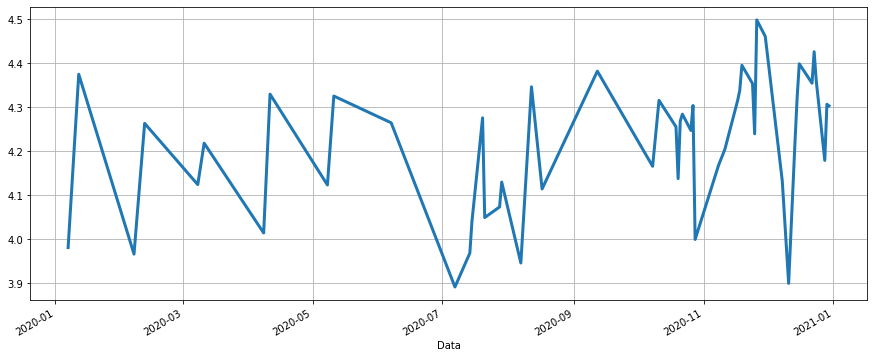

In [ ]:
# o estudo das séries temporais utiliza muitos gráficos
# como exemplo vamos utilizar um gráfico de linha projetando as variações do valor de abertura diário (Close)

gasolina['Valor'].plot(figsize=(15,6), grid=True, linewidth=3)

In [ ]:
gasolina.sort_index(inplace=True)

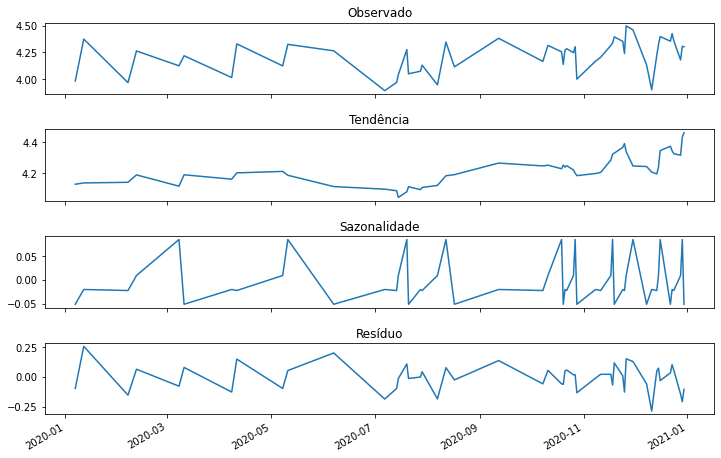

In [ ]:
# vamos realizar a decomposição salvando o resultado em: analise
analise = seasonal_decompose(gasolina, freq=5, extrapolate_trend = 5)

# geraremos 4 gráficos, sendo eles:
# 1 - Observação original
# 2 - Tendência
# 3 - Sazonalidade
# 4 - Residual ou variável aleatória

fig, ax = plt.subplots(figsize=(12,8))
plt.subplots_adjust(hspace=0.5)

ax0 = plt.subplot(411)
plt.plot(analise.observed)
ax0.set_title('Observado')

ax1 = plt.subplot(412)
plt.plot(analise.trend)
ax1.set_title('Tendência')

ax2 = plt.subplot(413)
plt.plot(analise.seasonal)
ax2.set_title('Sazonalidade')

ax3 = plt.subplot(414)
plt.plot(analise.resid)
ax3.set_title('Resíduo')
fig.autofmt_xdate()